In [2]:
pip install psychrnn

# Hello World!

A popular 2-alternative forced choice perceptual discrimination task is the random dot motion (RDM) task. In RDM, the subject observes dots moving in different directions. The RDM task is a forced choice task -- although dots can move in any direction, their are two directions in which the movement of the coherent dots could be. The subject must make a choice towards one of the two directions at the end of the stimulus period ([Britten et al., 1992](https://www.jneurosci.org/content/12/12/4745)).

To make it possible for an RNN to complete this task, we model this task as two simultaneous noisy inputs into each of two input channels, representing the two directions. The network must determine which channel has the higher mean input and respond by driving the corresponding output unit to 1, and the other output unit to .2. We've included this example task in PsychRNN as [PerceptualDiscrimination](../apidoc/tasks.rst#module-psychrnn.tasks.perceptual_discrimination).

To get started, let's train a basic model in PsychRNN on this 2-alternative forced choice perceptual discrimination task and test how it does on task input. For simplicity, we will use the model defaults.

Iter 1280, Minibatch Loss= 0.197932
Iter 2560, Minibatch Loss= 0.108772
Iter 3840, Minibatch Loss= 0.095725
Iter 5120, Minibatch Loss= 0.083484
Iter 6400, Minibatch Loss= 0.073516
Iter 7680, Minibatch Loss= 0.073240
Iter 8960, Minibatch Loss= 0.058267
Iter 10240, Minibatch Loss= 0.036262
Iter 11520, Minibatch Loss= 0.018211
Iter 12800, Minibatch Loss= 0.017931
Iter 14080, Minibatch Loss= 0.012969
Iter 15360, Minibatch Loss= 0.009447
Iter 16640, Minibatch Loss= 0.010920
Iter 17920, Minibatch Loss= 0.009729
Iter 19200, Minibatch Loss= 0.008411
Iter 20480, Minibatch Loss= 0.008554
Iter 21760, Minibatch Loss= 0.007661
Iter 23040, Minibatch Loss= 0.006737
Iter 24320, Minibatch Loss= 0.007400
Iter 25600, Minibatch Loss= 0.009087
Iter 26880, Minibatch Loss= 0.007553
Iter 28160, Minibatch Loss= 0.007028
Iter 29440, Minibatch Loss= 0.006113
Iter 30720, Minibatch Loss= 0.005714
Iter 32000, Minibatch Loss= 0.005170
Iter 33280, Minibatch Loss= 0.004672
Iter 34560, Minibatch Loss= 0.004624
Iter 358

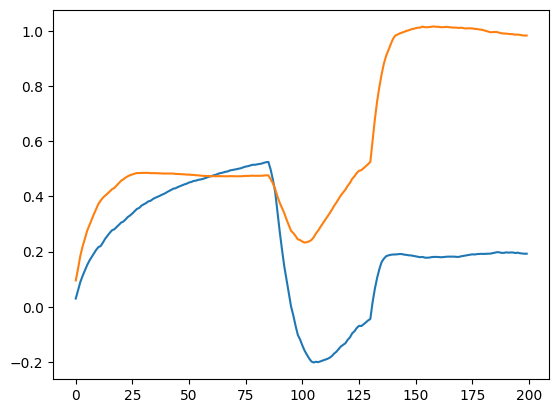

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

# ---------------------- Import the package ---------------------------
from psychrnn.tasks.perceptual_discrimination import PerceptualDiscrimination
from psychrnn.backend.models.basic import Basic

# ---------------------- Set up a basic model ---------------------------
pd = PerceptualDiscrimination(dt = 10, tau = 100, T = 2000, N_batch = 128)
network_params = pd.get_task_params() # get the params passed in and defined in pd
network_params['name'] = 'model' # name the model uniquely if running mult models in unison
network_params['N_rec'] = 50 # set the number of recurrent units in the model
model = Basic(network_params) # instantiate a basic vanilla RNN

# ---------------------- Train a basic model ---------------------------
model.train(pd) # train model to perform pd task

# ---------------------- Test the trained model ---------------------------
x,target_output,mask, trial_params = pd.get_trial_batch() # get pd task inputs and outputs
model_output, model_state = model.test(x) # run the model on input x

# ---------------------- Plot the results ---------------------------
plt.plot(model_output[0])

# ---------------------- Teardown the model -------------------------
model.destruct()

Congratulations! You’ve successfully trained and tested your first model! Continue to [Simple Example](./PerceptualDiscrimination.ipynb) to learn how to define more useful models.